In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('health care diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.describe()            

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data['BMI']=data['BMI'].astype('int64')
data['DiabetesPedigreeFunction']=data['DiabetesPedigreeFunction'].astype('int64')

In [8]:
data.dtypes

Pregnancies                 int64
Glucose                     int64
BloodPressure               int64
SkinThickness               int64
Insulin                     int64
BMI                         int64
DiabetesPedigreeFunction    int64
Age                         int64
Outcome                     int64
dtype: object

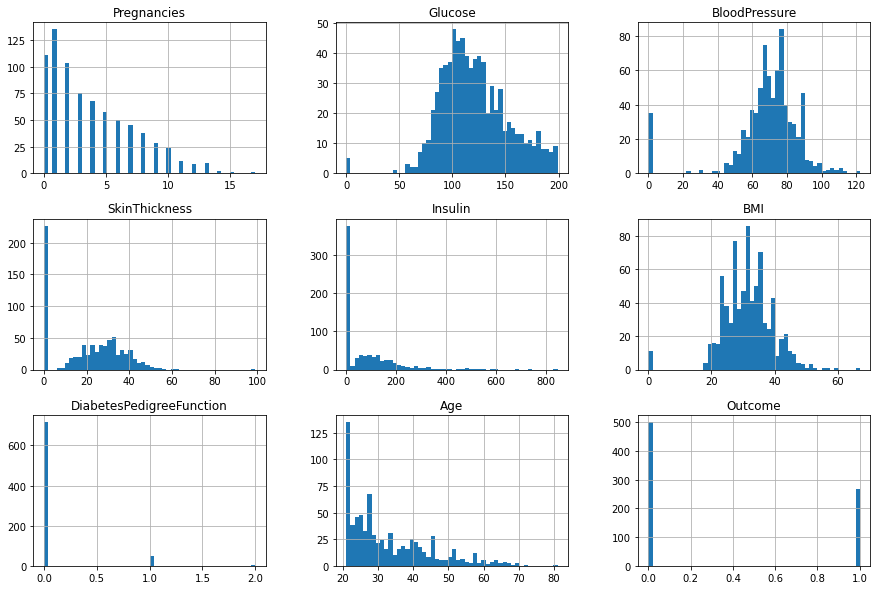

In [9]:
data.hist(bins=50, figsize=(15,10))
plt.show()

glucose, blood pressure, skin thickness, insulin and BMI are having missing values as 0
Most Machine Learning algorithms cannot work with missing features, so let’s create
a few functions to take care of them

In [10]:
data1 = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[data1]=data[data1].replace(0, np.nan)

In [11]:
data=data.fillna(data.median())

In [12]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction      int64
Age                           int64
Outcome                       int64
dtype: object

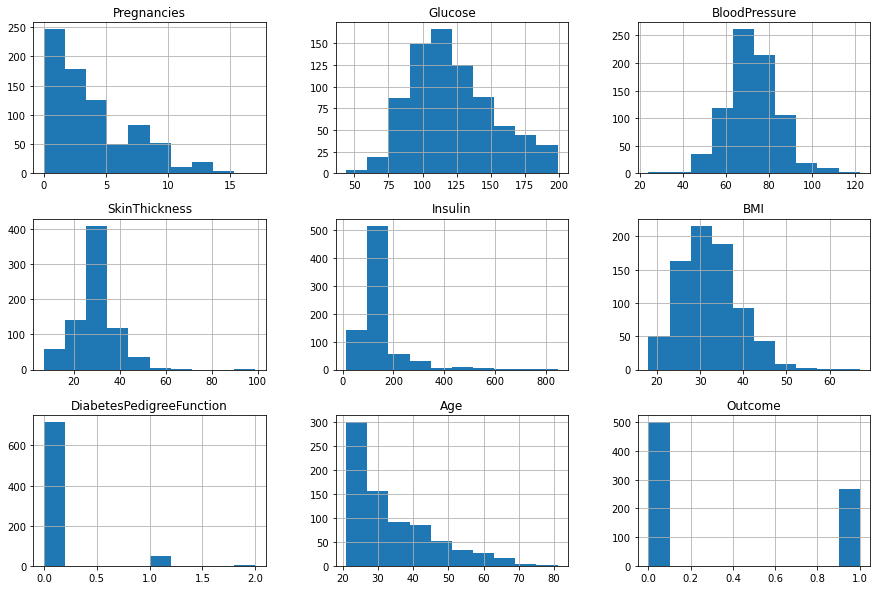

In [13]:
data.hist(bins=10, figsize=(15,10))
plt.show()

Text(0.5, 1.0, 'Glucose')

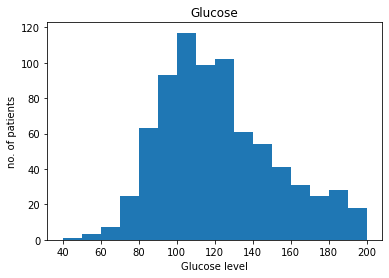

In [14]:
bins=[40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
plt.hist(data['Glucose'], bins=bins)
plt.xlabel('Glucose level')
plt.ylabel('no. of patients')
plt.title('Glucose')

The nomal glucose level is between 80 and 115. If its above 115 you are considered as diabetic, the outcome is '1'.
we can see from the above plot that there are more than 100 patients whose glucose levels are baove 120

Text(0.5, 0, 'blood pressure range')

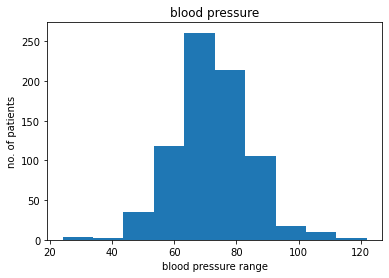

In [15]:
plt.hist(data['BloodPressure'], bins=10)
plt.title('blood pressure')
plt.ylabel('no. of patients')
plt.xlabel('blood pressure range')


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

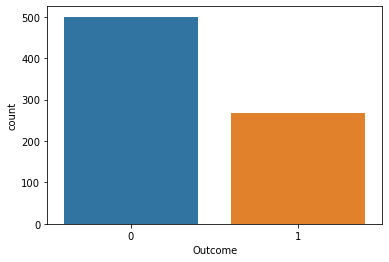

In [16]:
sns.countplot(data['Outcome'])

<AxesSubplot:xlabel='Age', ylabel='count'>

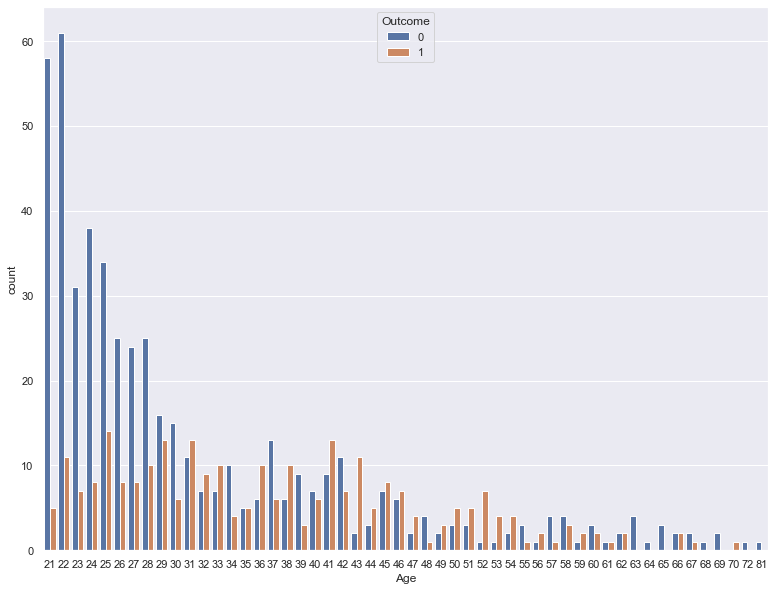

In [17]:
sns.set(rc={'figure.figsize':(13,10)})
sns.countplot(data=data, x='Age', hue='Outcome')

from the above plot we can determine that more number patients who are at the age of 21-30 are non diabetic and 
we can see more number of diabetic patients are at the age of 31 to 55 and the reason this age grup is having a lot of diabetic patients is be because of less physical activity or exercise
and from the age of 56 to 81 it is less populated and diabetic patients

In [18]:
data=data.astype('int64')
data.dtypes

Pregnancies                 int64
Glucose                     int64
BloodPressure               int64
SkinThickness               int64
Insulin                     int64
BMI                         int64
DiabetesPedigreeFunction    int64
Age                         int64
Outcome                     int64
dtype: object

In [19]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

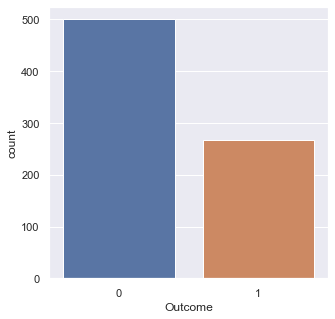

In [20]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(data['Outcome'])

this is an imbalanced dataset as the class - 1 and class - 0 are having 500 and 268 instances which is in the ratio of 2:1

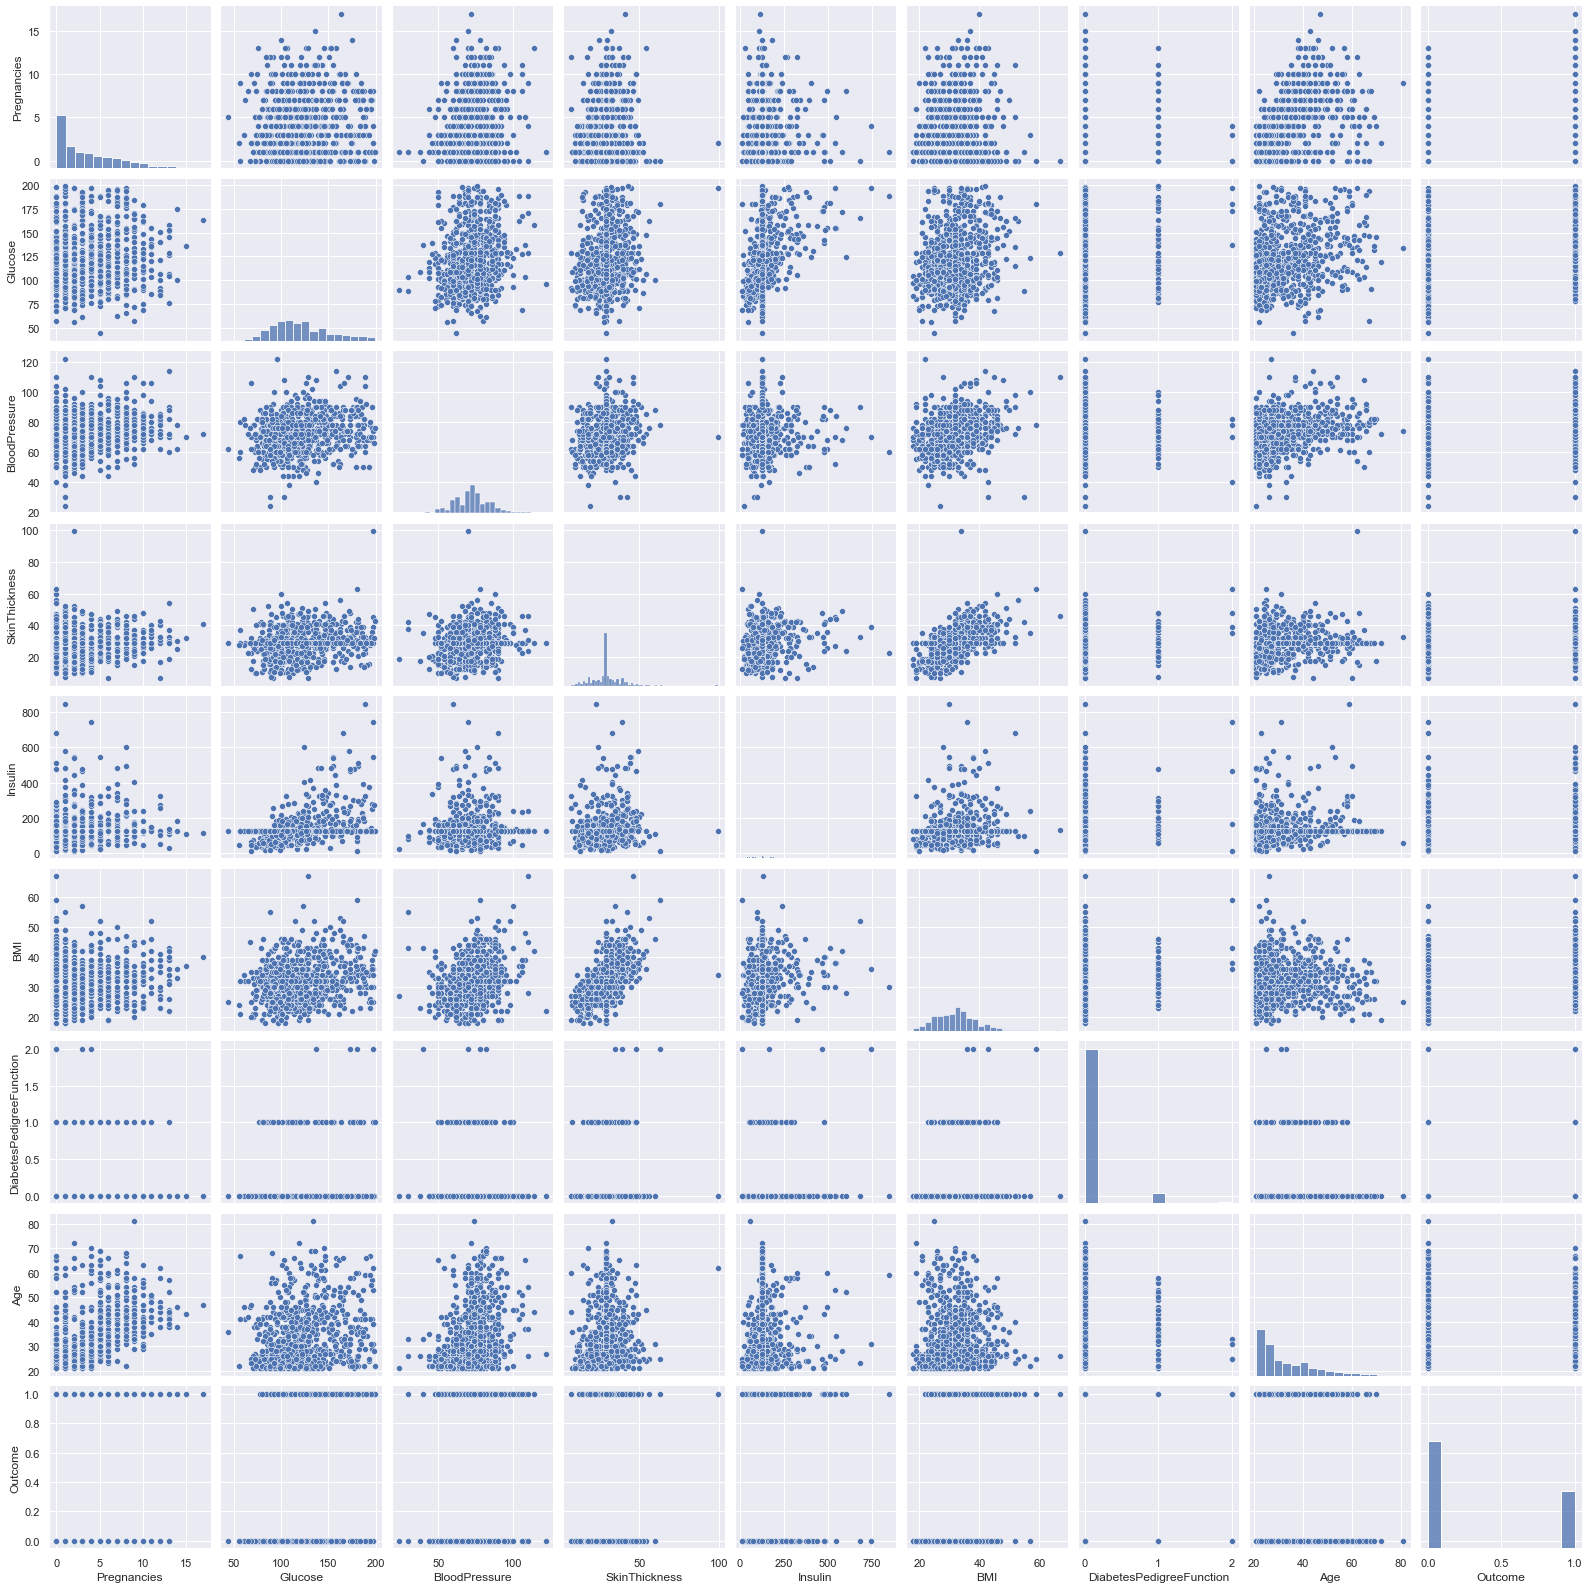

In [21]:
sns.pairplot(data)

looking at the pair plot we can see that there is a positive correlation between BMI and skin thickness, and age and pregnancies

<AxesSubplot:>

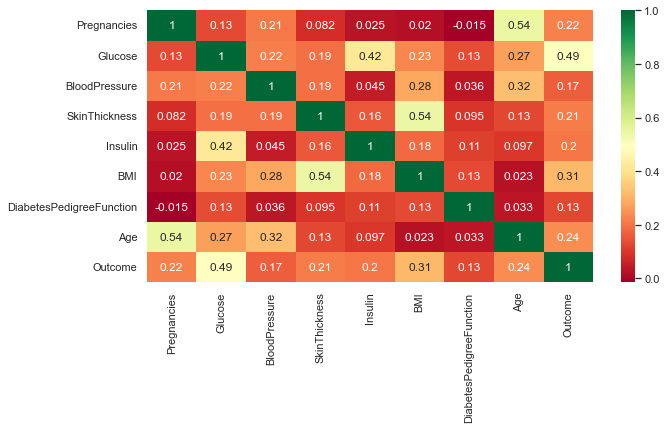

In [22]:
correlation = data.corr()
top_corr_features = correlation.index
plt.figure(figsize=(10,5))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

from the above heatmap we can see that outcome and glucose have high correlation and outcome and diabetes pedigree functions has almost no correlation
pregnancies and age, glucose and insulin, skin thickness and BMI,  have high correlation


In [23]:
data.drop(['BloodPressure', 'DiabetesPedigreeFunction'], axis=1, inplace=True)

In [24]:
data.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,35,125,33,50,1
1,1,85,29,125,26,31,0
2,8,183,29,125,23,32,1
3,1,89,23,94,28,21,0
4,0,137,35,168,43,33,1


Data modeling

In [25]:
X = data.drop(['Outcome'], axis=1)
y= data['Outcome']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

Model evaluation using confusion matrix

In [30]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
cf_matrix

array([[97, 10],
       [20, 27]], dtype=int64)

Text(0.5, 320.8, 'Predicted label')

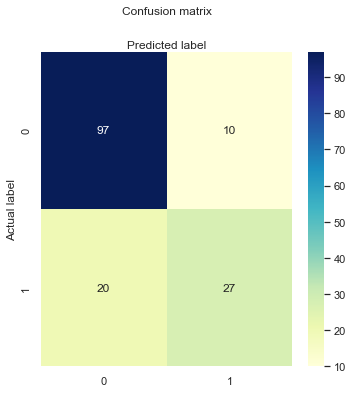

In [31]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8051948051948052
Precision: 0.7297297297297297
Recall: 0.574468085106383


We got the classification rate of 80% considered as the good accuracy. This are true results among the total number of cases examined.

The model got the 72% accururateness in predicting the patients with diabetes.

Reacall: This are the results of the patients predicted to have diabetes and Logistic regression can capture 57% of patients with diabetes.

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier(random_state=0))])

In [35]:
pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

In [36]:
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression())])

In [37]:
pipeline_knn=Pipeline([('kn_classifier',KNeighborsClassifier())])

In [38]:
pipelines = [pipeline_dt,pipeline_rf,pipeline_knn,pipeline_lr]

In [39]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [40]:
pipe_dict = {0: 'Decision Tree', 1: 'RandomForest', 2: 'KNeighbors', 3:'Logistic Regression'}

#Fit the pipilines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [41]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Decision Tree Test Accuracy: 0.7337662337662337
RandomForest Test Accuracy: 0.7987012987012987
KNeighbors Test Accuracy: 0.7662337662337663
Logistic Regression Test Accuracy: 0.8051948051948052


In [42]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier])) 

Classifier with best accuracy:Logistic Regression


Logistic regression is the best classifier comparing with other algorithms with an accuracy score of 80%

Confusion matrix for each algorithm

Decision tree confusion matrix

In [43]:
y_pred_0 = pipeline_dt.predict(X_test)

In [44]:
dt_cnf_matrix = metrics.confusion_matrix(y_test,y_pred_0)
dt_cnf_matrix

array([[84, 23],
       [18, 29]], dtype=int64)

Random forest confusion matrix

In [45]:
y_pred_1 = pipeline_rf.predict(X_test)

In [46]:
rf_cnf_matrix = metrics.confusion_matrix(y_test, y_pred_1)
rf_cnf_matrix

array([[91, 16],
       [15, 32]], dtype=int64)

KNN confusion matrix

In [47]:
y_pred_2 = pipeline_knn.predict(X_test)

In [48]:
knn_cnf_matrix = metrics.confusion_matrix(y_test,y_pred_2)
knn_cnf_matrix

array([[91, 16],
       [20, 27]], dtype=int64)

Logistic regression confusion matrix

In [49]:
y_pred_3 = pipeline_lr.predict(X_test)

In [50]:
lr_cnf_matrix = metrics.confusion_matrix(y_test,y_pred_3)
lr_cnf_matrix

array([[97, 10],
       [20, 27]], dtype=int64)

Looking at the results KNN got better true poitives compared to decision tree and random forest however decison tree and random are the only algorithns which got the better true negatives. If we have to choose the data with non diabetic patients we would have choosen decision tree and randon forest

KNN and logistic regression are better choices in identifying true positive diabetic patients compared to decision tree and random forest

However two confusion matrics of Logistic regression and KNearest Neighbours makes it hard to decide which machine learning model is better fit for the data as they differ with small margin

We need to use more sophisticated metrics, like Sensitivity, Specificity, ROC and AUC that can help us make a decision.

Sensitivity and specificity for Logistic Regression and KNearest Neighbours

In [51]:
#KNearest Neighbours
sensitivity, specificity = [91/(91+20), 27/(27+16)]
print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 0.8198198198198198
specificity: 0.627906976744186


In [52]:
#logistic Regression
sensitivity, specificity = [97/(97+20), 27/(27+10)]
print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 0.8290598290598291
specificity: 0.7297297297297297


Logistic Regression has got the better sensitivity and specificity results. 

Lets try and improve the performance of the Random classifier by tresholding

ROC curve of the Random Classifier and perfect classifier(default treshold = 0.5)

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,tresholds = roc_curve(y_test, pipeline_rf.predict_proba(X_test)[:,1])

In [54]:
fpr

array([0.        , 0.        , 0.        , 0.00934579, 0.00934579,
       0.00934579, 0.00934579, 0.00934579, 0.00934579, 0.00934579,
       0.01869159, 0.02803738, 0.02803738, 0.03738318, 0.03738318,
       0.05607477, 0.05607477, 0.07476636, 0.07476636, 0.09345794,
       0.09345794, 0.11214953, 0.11214953, 0.12149533, 0.12149533,
       0.13084112, 0.13084112, 0.14953271, 0.1588785 , 0.1682243 ,
       0.18691589, 0.18691589, 0.20560748, 0.20560748, 0.22429907,
       0.24299065, 0.25233645, 0.28971963, 0.28971963, 0.31775701,
       0.3364486 , 0.34579439, 0.36448598, 0.39252336, 0.39252336,
       0.40186916, 0.42056075, 0.42990654, 0.43925234, 0.4953271 ,
       0.5046729 , 0.52336449, 0.53271028, 0.56074766, 0.57943925,
       0.61682243, 0.64485981, 0.68224299, 0.69158879, 0.71028037,
       0.71962617, 0.79439252, 0.82242991, 0.86915888, 0.92523364,
       1.        ])

In [55]:
tpr

array([0.        , 0.0212766 , 0.06382979, 0.06382979, 0.08510638,
       0.12765957, 0.17021277, 0.23404255, 0.27659574, 0.34042553,
       0.34042553, 0.36170213, 0.38297872, 0.40425532, 0.42553191,
       0.42553191, 0.44680851, 0.44680851, 0.4893617 , 0.53191489,
       0.55319149, 0.55319149, 0.57446809, 0.59574468, 0.61702128,
       0.61702128, 0.65957447, 0.68085106, 0.72340426, 0.74468085,
       0.76595745, 0.78723404, 0.78723404, 0.80851064, 0.80851064,
       0.80851064, 0.80851064, 0.82978723, 0.85106383, 0.85106383,
       0.87234043, 0.87234043, 0.87234043, 0.87234043, 0.89361702,
       0.89361702, 0.89361702, 0.91489362, 0.95744681, 0.95744681,
       0.95744681, 0.95744681, 0.95744681, 0.95744681, 0.95744681,
       0.95744681, 0.9787234 , 0.9787234 , 0.9787234 , 0.9787234 ,
       0.9787234 , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [56]:
tresholds

array([1.94, 0.94, 0.93, 0.92, 0.91, 0.9 , 0.86, 0.85, 0.84, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.74, 0.71, 0.7 , 0.69, 0.66, 0.64, 0.6 , 0.58,
       0.57, 0.56, 0.55, 0.53, 0.52, 0.51, 0.5 , 0.48, 0.46, 0.43, 0.41,
       0.4 , 0.38, 0.36, 0.35, 0.32, 0.31, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12,
       0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.01, 0.  ])

In [57]:
rf_roc_auc1 = roc_auc_score(y_test, pipeline_rf.predict(X_test))

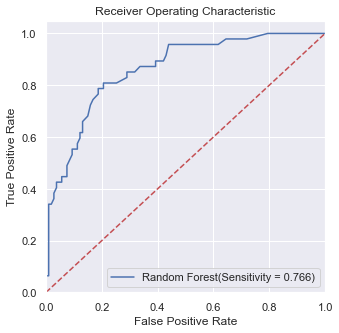

In [58]:
plt.figure()
plt.plot(fpr, tpr, label='Random Forest(Sensitivity = %0.3f)' % rf_roc_auc1)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Tuning the threshold value to build a classifier model with more desired output.

In [59]:
y_pred_11 = pipeline_rf.predict_proba(X_test)[:,1]
y_pred_11 = y_pred_11.reshape(-1,1)
y_pred_11

array([[0.93],
       [0.22],
       [0.09],
       [0.52],
       [0.11],
       [0.  ],
       [0.77],
       [0.84],
       [0.19],
       [0.36],
       [0.74],
       [0.81],
       [0.02],
       [0.04],
       [0.32],
       [0.65],
       [0.84],
       [0.01],
       [0.29],
       [0.17],
       [0.57],
       [0.1 ],
       [0.03],
       [0.24],
       [0.03],
       [0.18],
       [0.03],
       [0.79],
       [0.  ],
       [0.13],
       [0.38],
       [0.26],
       [0.12],
       [0.3 ],
       [0.18],
       [0.86],
       [0.48],
       [0.02],
       [0.17],
       [0.78],
       [0.21],
       [0.12],
       [0.16],
       [0.9 ],
       [0.78],
       [0.07],
       [0.05],
       [0.23],
       [0.27],
       [0.31],
       [0.42],
       [0.09],
       [0.88],
       [0.76],
       [0.28],
       [0.  ],
       [0.11],
       [0.32],
       [0.2 ],
       [0.5 ],
       [0.93],
       [0.69],
       [0.01],
       [0.64],
       [0.9 ],
       [0.56],
       [0.

In [60]:
from sklearn.preprocessing import Binarizer

In [61]:
bin = Binarizer(threshold = 0.35)

In [62]:
y_pred_11 = bin.fit_transform(y_pred_11)
y_pred_11

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],

In [63]:
y_pred_11 = y_pred_11.astype('int64')
y_pred_11

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [64]:
rf_cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred_11)
rf_cnf_matrix1

array([[81, 26],
       [ 9, 38]], dtype=int64)

Text(0.5, 320.8, 'Predicted label')

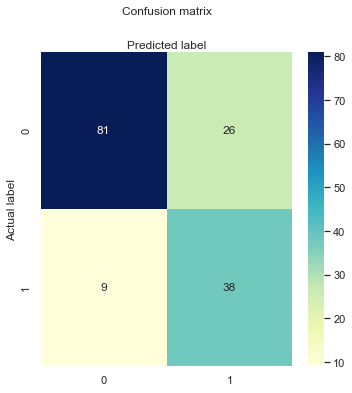

In [65]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(rf_cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [66]:
rf_cnf_matrix

array([[91, 16],
       [15, 32]], dtype=int64)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_11))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       107
           1       0.59      0.81      0.68        47

    accuracy                           0.77       154
   macro avg       0.75      0.78      0.75       154
weighted avg       0.81      0.77      0.78       154



We compare the performance metrics (above) at threshold 0.6 to the performance metrics at default threshold (below).

In [68]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       107
           1       0.67      0.68      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.80      0.80      0.80       154



In [69]:
rf_roc_auc2 = roc_auc_score(y_test, y_pred_11)

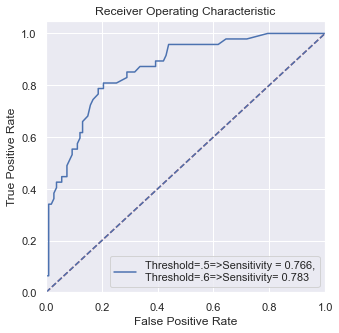

In [70]:
plt.figure()
plt.plot(fpr, tpr, label='Threshold=.5=>Sensitivity = %0.3f,\nThreshold=.6=>Sensitivity= %0.3f' % (rf_roc_auc1,rf_roc_auc2))
plt.plot([0,1], [0,1], 'r--')
plt.plot([0,1], [0,1], 'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="best")
plt.savefig('Log_ROC')         
plt.show()

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, pipeline_lr.predict_proba(X_test)[:,1])

In [72]:
fpr

array([0.        , 0.        , 0.00934579, 0.00934579, 0.01869159,
       0.01869159, 0.02803738, 0.02803738, 0.03738318, 0.03738318,
       0.04672897, 0.04672897, 0.07476636, 0.07476636, 0.08411215,
       0.08411215, 0.13084112, 0.13084112, 0.14953271, 0.14953271,
       0.18691589, 0.18691589, 0.20560748, 0.20560748, 0.21495327,
       0.21495327, 0.23364486, 0.23364486, 0.28037383, 0.28037383,
       0.28971963, 0.28971963, 0.31775701, 0.31775701, 0.3364486 ,
       0.3364486 , 0.34579439, 0.34579439, 0.35514019, 0.35514019,
       0.36448598, 0.36448598, 0.55140187, 0.55140187, 1.        ])

In [73]:
tpr

array([0.        , 0.0212766 , 0.0212766 , 0.08510638, 0.08510638,
       0.21276596, 0.21276596, 0.44680851, 0.44680851, 0.5106383 ,
       0.5106383 , 0.53191489, 0.53191489, 0.55319149, 0.55319149,
       0.57446809, 0.57446809, 0.59574468, 0.59574468, 0.61702128,
       0.61702128, 0.63829787, 0.63829787, 0.70212766, 0.70212766,
       0.72340426, 0.72340426, 0.76595745, 0.76595745, 0.78723404,
       0.78723404, 0.82978723, 0.82978723, 0.85106383, 0.85106383,
       0.89361702, 0.89361702, 0.91489362, 0.91489362, 0.93617021,
       0.93617021, 0.9787234 , 0.9787234 , 1.        , 1.        ])

In [74]:
thresholds

array([1.95129645, 0.95129645, 0.93078323, 0.87879394, 0.87877279,
       0.81571088, 0.81082738, 0.70740936, 0.68374786, 0.65962431,
       0.63920643, 0.63281277, 0.5779246 , 0.53561055, 0.53334954,
       0.52686069, 0.43967612, 0.43294321, 0.4306744 , 0.42045682,
       0.39795101, 0.39516672, 0.37400643, 0.37006612, 0.36201721,
       0.36020273, 0.35987073, 0.34209637, 0.32378134, 0.3235675 ,
       0.31526401, 0.29683571, 0.29061747, 0.29026973, 0.27185983,
       0.26043263, 0.24943345, 0.24870405, 0.24111399, 0.2330104 ,
       0.23106284, 0.22808291, 0.15882684, 0.15737176, 0.0224061 ])

In [75]:
lr_roc_auc3 = roc_auc_score(y_test, pipeline_lr.predict(X_test))

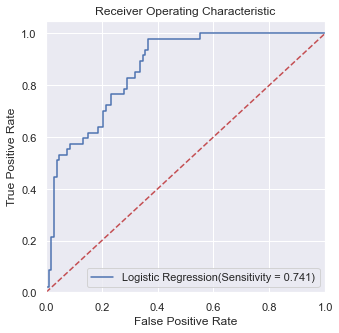

In [76]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(Sensitivity = %0.3f)' % lr_roc_auc3)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()